# STA130 Homework 06

Please see the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) for the list of topics covered in this homework assignment, and a list of topics that might appear during ChatBot conversations which are "out of scope" for the purposes of this homework assignment (and hence can be safely ignored if encountered)

### Marking Rubric (which may award partial credit) 

- [0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
- [0.2 points]: Evaluation of correctness and clarity in written communication for Question "3"
- [0.2 points]: Evaluation of correctness and clarity in written communication for Question "4"
- [0.2 points]: Evaluation of submitted work and conclusions for Question "9"
- [0.3 points]: Evaluation of written communication of the "big picture" differences and correct evidence assessement for Question "11"


## "Week of Oct21" HW [*due prior to the Nov08 TUT*]

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Your answer can be quite concise and will likely just address the "mathematical" and "statistical" aspects of the process of a **Simple Linear Model** specification, perhaps giving an intuitive interpretation summary of the result as a whole_
>   
> - _Your code could be based on values for `n`, `x`, `beta0`, `beta1`, and `sigma`; and, then create the `errors` and `Y`_
> 
> - _The predictors $x_i$ can be fixed arbitrarily to start the process (perhaps sampled using `stats.uniform`), and they are conceptually different from the creation of **error** (or **noise**) terms $\epsilon_i$ which are sampled from a **normal distribution** (with some aribtrarily *a priori* chosen **standard deviation** `scale` parameter $\sigma$) which are then combined with $x_i$ through the **Simple Linear Model** equation (based on aribtrarily *a priori* chosen **slope** and **intercept coefficients**) to produce the $Y_i$ outcomes_
> 
> - _It should be fairly easy to visualize the "a + bx" line defined by the **Simple Linear Model** equation, and some **simulated** data points around the line in a `plotly` figure using the help of a ChatBot_
> 
> _If you use a ChatBot (as expected for this problem), **don't forget to ask for summaries of your ChatBot session(s) and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatGPT)**_
>
> 
> _**Question Scope Warning:** Be careful when using a ChatBot to help you with creating an example dataset and coding up a visualization though, **because it might suggest creating (and visualizing) a fitted model for to your data (rather than the theoretical model); but, this is not what this question is asking you to demonstrate**. This question is not asking about how to produce a fitted **Simple Linear Regression** model or explain how model **slope** and **intercept coefficients** are calculated (e.g., using "ordinary least squares" or analytical equations to estimate the **coefficients**  for an observed dataset)._
> 
> ```python
> # There are two distinct ways to use `plotly` here
>
> import plotly.express as px
> px.scatter(df, x='x',  y='Y', color='Data', 
>            trendline='ols', title='Y vs. x')
>        
> import plotly.graph_objects as go
> fig = go.Figure()
> fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))
> 
> # The latter is preferable since `trendline='ols'` in the former 
> # creates a fitted model for the data and adds it to the figure
> # and, again, THAT IS NOT what this problem is asking for right now
> ```
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>


A theoretical Simple Linear Regression model explains how a continuous outcome variable  Y  can be predicted by a continuous predictor variable  X. The relationship between  X  and  Y  is modeled as a straight line, with some random noise or error. This model is useful for understanding how changes in  X  lead to changes in  Y, plus a little randomness due to factors not captured by  X  alone.

Components of the Simple Linear Regression Model:

	1.Outcome Variable ( Y ): This is the variable we want to predict or explain. Each value of  Y  is assumed to depend on both the predictor  X  and a random error.
	2.Predictor Variable ( X ): This is the variable used to predict  Y. We assume that each unit in our data has a value for  X.
	3.Slope Coefficient ( Beta1 ): This value represents the rate of change in  Y  for a one-unit increase in  X . If  beta1  is positive,  Y  increases as  X  increases; if it’s negative,  Y  decreases as  X  increases.
	4.Intercept ( Beta0 ): This is the expected value of  Y  when  X = 0 . It represents where the regression line crosses the  Y -axis.
	5.Error Term ( Epsiolon ): This term represents the variation in  Y  that is not explained by  X . It’s assumed to be a random variable that follows a normal distribution with mean 0 and constant variance  sigma^2 .

Model Equation:

The simple linear regression equation is:

Y = beta0 + beta1 X + epsiloon

where  epsilon ~ N(0, sigma^2) . This means that for a given value of  X ,  Y  follows a normal distribution centered around  beta0 + beta1 X  with variance  sigma^2.

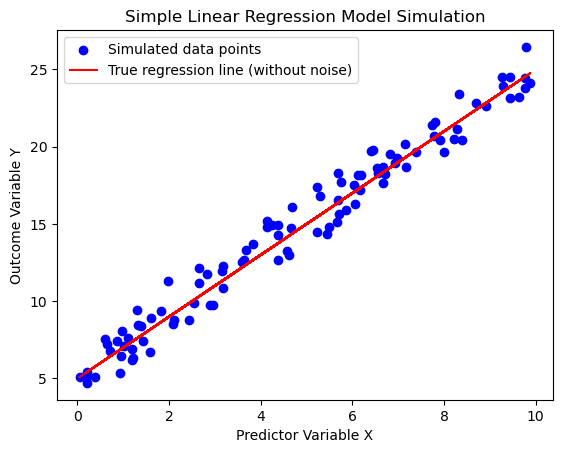

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the regression model
beta_0 = 5  # intercept
beta_1 = 2  # slope
sigma = 1   # standard deviation of the error term

# Generate random predictor values X
np.random.seed(0)  # for reproducibility
X = np.random.uniform(0, 10, 100)

# Generate the error term (epsilon) from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=100)

# Compute the outcome variable Y based on the regression model
Y = beta_0 + beta_1 * X + epsilon

# Plot the data points and the true regression line without noise
plt.scatter(X, Y, color="blue", label="Simulated data points")
plt.plot(X, beta_0 + beta_1 * X, color="red", label="True regression line (without noise)")
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.legend()
plt.title("Simple Linear Regression Model Simulation")
plt.show()

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> - _Combine the **simulated** `x` and `Y` into a `pandas` data frame object named `df` with the column names "x" and "Y"_
> 
> - _Replace the inline question comments below with their answers (working with a ChatBot if needed)_
>
> ```python
> import statsmodels.formula.api as smf  # what is this library for?
> import plotly.express as px  # this is a ploting library
>
> # what are the following two steps doing?
> model_data_specification = smf.ols("Y~x", data=df) 
> fitted_model = model_data_specification.fit() 
>
> # what do each of the following provide?
> fitted_model.summary()  # simple explanation? 
> fitted_model.summary().tables[1]  # simple explanation?
> fitted_model.params  # simple explanation?
> fitted_model.params.values  # simple explanation?
> fitted_model.rsquared  # simple explanation?
>
> # what two things does this add onto the figure?
> df['Data'] = 'Data' # hack to add data to legend 
> fig = px.scatter(df, x='x',  y='Y', color='Data', 
>                  trendline='ols', title='Y vs. x')
>
> # This is essentially what above `trendline='ols'` does
> fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
>                 line=dict(color='blue'), name="trendline='ols'")
> 
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
>
> _The plotting here uses the `plotly.express` form `fig.add_scatter(x=x, y=Y)` rather than the `plotly.graph_objects` form `fig.add_trace(go.Scatter(x=x, y=Y))`. The difference between these two was noted in the "Further Guidance" comments in the previous question; but, the preference for the former in this case is because `px` allows us to access `trendline='ols'` through `px.scatter(df, x='x',  y='Y', trendline='ols')`_
>
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_      

</details>

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3262.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.88e-77
Time:                        22:16:20   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2222      0.193     27.017      0.0

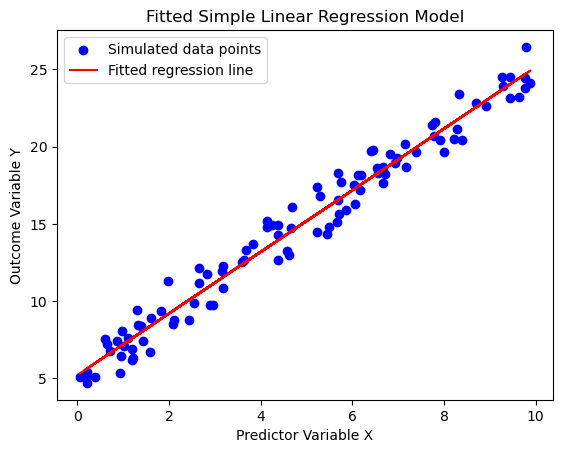

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters for the regression model
beta_0 = 5  # intercept
beta_1 = 2  # slope
sigma = 1   # standard deviation of the error term

# Generate random predictor values X
np.random.seed(0)  # for reproducibility
X = np.random.uniform(0, 10, 100)

# Generate the error term (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, 100)

# Compute the outcome variable Y based on the regression model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the simulated data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the linear regression model
model = smf.ols('Y ~ X', data=data).fit()

# Display the summary of the regression results
print(model.summary())

# Plot the data points
plt.scatter(data['X'], data['Y'], color="blue", label="Simulated data points")

# Plot the fitted regression line
plt.plot(data['X'], model.fittedvalues, color="red", label="Fitted regression line")

# Add labels and legend
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.legend()
plt.title("Fitted Simple Linear Regression Model")
plt.show()

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _This question is effectively asking you to explain what the combined code you produced for Questions 1 and 2 is trying to demonstrate overall. If you're working with a ChatBot (as expected), giving these two sets of code as context, and asking what the purpose of comparing these lines could be would be a way to get some help in formulating your answer_
> 
> _The graphical visualization aspect of this question could be accomplished by appending the following code to the code provided in Question 2._
> 
> ```python
> # what does this add onto the figure in constrast to `trendline='ols'`?
> x_range = np.array([df['x'].min(), df['x'].max()])
> # beta0 and beta1 are assumed to be defined
> y_line = beta0 + beta1 * x_range
> fig.add_scatter(x=x_range, y=y_line, mode='lines',
>                 name=str(beta0)+' + '+str(beta1)+' * x', 
>                 line=dict(dash='dot', color='orange'))
>
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
> 
> _The right way to interactively "see" the answer to this question is to repeatedly create different dataset **simulations** using your theoretical model and the corresponding fitted models, and repeatedly visualize the data and the two lines over and over... this would be as easy as rerunning a single cell containing your simulation and visualization code..._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

True Regression Line (Green Dashed Line): This line represents the underlying “true” relationship we used to generate the data, given by  Y = beta0 + beta1 X . It reflects the exact theoretical model we assumed when simulating the dataset, without any noise.

Fitted Regression Line (Red Line): This line is estimated from the sample data using statsmodels. It represents the best-fit line based on the observed data points, taking into account the random error term added during data simulation.

Difference Between the Two Lines

The main difference between these two lines is due to random sampling variation.The true line represents the idealized relationship between  X  and  Y  as if we could observe this relationship perfectly, without any error. The fitted line, however, is affected by the specific random errors (or noise) added to each data point in the simulation. Due to this randomness, the fitted line will likely deviate slightly from the true line. This deviation is normal and expected when fitting a model to data, as any sample will introduce some randomness that can affect the estimate of the slope and intercept.

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _The previous questions used code to explore the distinction between theoretical (true) $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \;[\text{where } \epsilon_i \sim \mathcal{N}(0, \sigma)]\;$ and fitted (estimated) $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ **Simple Linear Regression** models_
>
> _This question asks you to explicitly illustrate how the the latter "in sample predictions" of the fitted **Simple Linear Regression** model $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ are made (in contrast to the linear equation of the theoretical model)_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

The fitted_model.fittedvalues in a Simple Linear Regression model are derived by applying the estimated intercept and slope coefficients (found in fitted_model.params) to each  X  value in the dataset. Specifically, each fitted value ^Yi  is calculated as  ^Yi = ^beta0 + ^beta1 Xi , where  ^beta0  and  ^beta1  are the intercept and slope estimated by the model using ordinary least squares. This produces the predicted  Y  values based on the fitted line.

## "Week of Nov04" HW [due prior to the Nov08 TUT]

_**In place of the "Data Analysis Assignment" format we introduced for the previous weeks' HW, the remaining questions will be a collection of exercises based around the following data**_

> The details of the "LOWESS Trendline" shown below are not a part of the intended scope of the activities here, but it is included since it is suggestive of the questions we will consider and address here


In [ ]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Remember that **Hypothesis Testing** is not a "mathematical proof"_
>
> - _We do not prove $H_0$ false, we instead give evidence against the $H_0$: "We reject the null hypothesis with a p-value of XYZ, meaning we have ABC evidence against the null hypothesis"_
> - _We do not prove $H_0$ is true, we instead do not have evidence to reject $H_0$: "We fail to reject the null hypothesis with a p-value of XYZ"_

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

</details>    

> ```python
> import seaborn as sns
> import statsmodels.formula.api as smf
>
> # The "Classic" Old Faithful Geyser dataset
> old_faithful = sns.load_dataset('geyser')
> 
> linear_for_specification = 'duration ~ waiting'
> model = smf.ols(linear_for_specification, data=old_faithful)
> fitted_model = model.fit()
> fitted_model.summary()
> ```


In the Old Faithful Geyser dataset, we can test the null hypothesis that there is “no linear association on average” between the waiting time before an eruption and the duration of the eruption, which corresponds to  beta1 = 0  in our regression model. Using the fitted model, if the p-value for the waiting variable is below a significance level, we reject the null hypothesis, indicating significant evidence of a linear association between waiting time and eruption duration. A low p-value would suggest that, on average, longer waiting times predict longer eruptions, supporting the belief that waiting time is a meaningful predictor of eruption duration.

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


In [6]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

NameError: name 'old_faithful' is not defined

Short wait limit of 62 minutes:
	Coefficient for waiting: 0.0261, with a p-value of 0.000.
	Interpretation: There is strong evidence (p < 0.05) that wait time is positively associated with eruption duration within this short wait period.
Short wait limit of 64 minutes:
	Coefficient for waiting: 0.0250, with a p-value of 0.000.
	Interpretation: Similar to the previous result, there is strong evidence of a positive association between wait time and duration for wait times under 64 minutes.
Short wait limit of 66 minutes:
	Coefficient for waiting: 0.0265, with a p-value of 0.000.
	Interpretation: Again, strong evidence of a positive relationship within this limit.

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>


In [ ]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

the model using an indicator variable for wait time categories (short < 68 minutes and long ≥ 68 minutes) shows a significant difference in eruption durations between short and long waits. The intercept represents the average duration for short waits (3.08 minutes), while the coefficient for long waits (1.0062) indicates that eruptions following long waits last, on average, about 1 minute longer than those after short waits. The very low p-value (< 0.05) provides strong evidence against the null hypothesis of no difference in duration between the two groups, suggesting that wait time length significantly impacts eruption duration.

chatbot summary:In this conversation, we discussed several statistical modeling concepts and how to apply them to the Old Faithful Geyser dataset. First, we explored Simple Linear Regression models, specifically how to assess the relationship between eruption duration and waiting time, both in full and restricted datasets based on wait time length. We considered the null hypothesis of “no linear association” and used regression results (p-values) to evaluate the strength of evidence against this null hypothesis.

We then examined how restricting wait times to shorter periods (under 68 minutes) affects the relationship between waiting time and eruption duration, and discussed the use of an indicator variable model to test for differences in eruption duration between “short” and “long” wait times. This model uses a categorical variable to represent the wait time category and tests whether the mean eruption durations differ between these categories, in contrast to earlier models that treated waiting time as a continuous variable. Finally, we clarified how to interpret the results from this new model, focusing on the evidence against the null hypothesis of “no difference” in average eruption duration between the two categories.

https://chatgpt.com/share/672d446d-cd98-8001-9dba-d8313cc282ec